In [1]:
import cvxpy as cp
import numpy as np
import trefide as tfd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

numba not found


Using TensorFlow backend.


In [2]:
# Load data
data = sp.io.loadmat("../CNMF_TF/data/post_demix.mat")
N, T = data['C'].shape

In [3]:
data['V'] = tfd.denoise(data['C'], 
                        noise_method='median',
                        noise_estimator='boot')

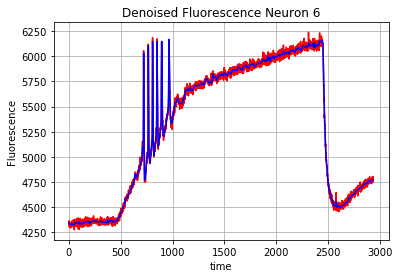

In [4]:
idx = np.random.randint(0, N)
fig, ax = plt.subplots()
ax.plot(np.arange(T), data['C'][idx,:], 'r')

ax.plot(np.arange(T), data['V'][idx,:],'b')

ax.set(xlabel='time', ylabel='Fluorescence',
       title='Denoised Fluorescence Neuron {}'.format(idx))
ax.grid()

plt.show()